### 🧠 Phân tích & Đánh giá Mô hình K-Nearest Neighbors (KNN)

#### 1. Tổng quan lý thuyết KNN  
K-Nearest Neighbors (KNN) là một thuật toán **học có giám sát** hoạt động dựa trên nguyên lý:  
> “Các điểm dữ liệu gần nhau trong không gian đặc trưng có xu hướng thuộc cùng một lớp.”

Khi dự đoán cho một mẫu mới, KNN tìm **K điểm gần nhất** trong tập huấn luyện, sau đó xác định nhãn dự đoán dựa trên **đa số phiếu (majority voting)**.  

Trong báo cáo này, mô hình sử dụng **k = 3** và **khoảng cách Manhattan (L1)**, được định nghĩa như sau:

$$
d_{\mathrm{Manhattan}}(x, y) = \sum_{i=1}^{n} |x_i - y_i|
$$

---

#### 2. Quy trình triển khai  
Mã nguồn được xây dựng **thủ công (from scratch)** nhằm thể hiện rõ cơ chế hoạt động của mô hình KNN.

1. **Chuẩn bị dữ liệu & Cross-validation**  
   - Dữ liệu được chia thành 5 phần (`folder_1` → `folder_5`) để thực hiện **5-fold cross-validation**.  
   - Mỗi vòng: chọn 1 phần làm *test set*, 4 phần còn lại làm *train set*.

2. **Chuẩn hóa dữ liệu (Min–Max Scaling)**  
   Chuẩn hóa dữ liệu theo công thức:  
   $$
   X' = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
   $$  
   Bước này giúp các đặc trưng có cùng thang đo, tránh sai lệch khi tính khoảng cách.

3. **Dự đoán nhãn**  
   - Tính khoảng cách Manhattan giữa mẫu test và toàn bộ mẫu train.  
   - Lấy **k = 3 điểm gần nhất**, thực hiện bỏ phiếu đa số để xác định nhãn.  

4. **Đánh giá mô hình**  
   - Tính **độ chính xác (Accuracy)** cho từng vòng cross-validation:  
     $$
     \text{Accuracy} = \frac{\text{Số mẫu dự đoán đúng}}{\text{Tổng số mẫu test}}
     $$  
   - Ghi lại kết quả từng fold và tính trung bình để đánh giá độ ổn định của mô hình.

---

#### 3. Nhận xét & Đánh giá  
**Ưu điểm:**  
- Triển khai trực quan, giúp hiểu rõ bản chất của thuật toán KNN.  
- Cross-validation cung cấp đánh giá tổng quát hơn, giảm phụ thuộc vào cách chia dữ liệu.  
- Quy trình chuẩn hóa dữ liệu được thực hiện đúng, đảm bảo tính công bằng khi đo khoảng cách.

**Hạn chế:**  
- **Chi phí tính toán cao:** Mỗi mẫu test phải so sánh với toàn bộ tập train → giảm hiệu suất với dữ liệu lớn.  
- **Giá trị k cố định:** Việc chọn k=3 chưa được kiểm chứng tối ưu bằng phương pháp thống kê.  
- **Nhạy cảm với dữ liệu nhiễu:** Một số điểm outlier có thể ảnh hưởng đến kết quả phân loại.

---

#### 4. Gợi ý cải tiến  
- **Tối ưu tham số k:** Thử nghiệm nhiều giá trị k (1, 3, 5, 7, …) để tìm giá trị tối ưu.  
- **So sánh các metric khác:** Thử nghiệm **Euclidean** hoặc **Cosine similarity** để xem sự khác biệt.  
- **Weighted KNN:** Áp dụng trọng số khoảng cách để các hàng xóm gần hơn có ảnh hưởng lớn hơn.  
- **Chuẩn hóa nâng cao:** Dùng **Z-score normalization** khi dữ liệu có phân bố chuẩn.

---

#### 5. Kết luận  
Mô hình KNN (k=3, Manhattan distance) thể hiện **độ chính xác ổn định** và phù hợp với mục tiêu minh họa thuật toán phân loại cơ bản.  
Việc triển khai thủ công giúp hiểu rõ từng bước trong pipeline học máy — từ chuẩn hóa, tính khoảng cách đến đánh giá mô hình.  
Kết quả này là nền tảng quan trọng để phát triển các mô hình phức tạp hơn trong tương lai.


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import MinMaxScaler


# === Hàm tính khoảng cách Manhattan ===
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

# === Hàm dự đoán bằng KNN ===
def knn_predict(test_sample, train_features, train_labels, k=3):
    # Tính khoảng cách từ test_sample đến tất cả train
    distances = [manhattan_distance(test_sample, train_features.iloc[i]) 
                 for i in range(len(train_features))]
    
    # Lấy chỉ số của k điểm gần nhất
    k_indices = np.argsort(distances)[:k]
    k_labels = train_labels.iloc[k_indices]
    
    # Bỏ phiếu đa số
    most_common = Counter(k_labels).most_common(1)[0][0]
    return most_common

# === Thư mục dữ liệu và kết quả ===
base_dir = "/media/pphong/D:/ML & DL/ML/AI_02/iris_folder"
result_dir = "/media/pphong/D:/ML & DL/ML/AI_02/result_folder"
os.makedirs(result_dir, exist_ok=True)

# === Danh sách folder ===
folders = [f"folder_{i}" for i in range(1, 6)]
results = []   # Lưu accuracy từng lần
k = 3          # Số láng giềng gần nhất

# === Cross-validation 5-fold ===
for test_folder in folders:
    print(f"\n===== Test với {test_folder} (k={k}) =====")

    # Test data
    test_path = os.path.join(base_dir, test_folder)
    test_csv = [f for f in os.listdir(test_path) if f.endswith('.csv')]
    if not test_csv:
        raise FileNotFoundError(f"Không tìm thấy file CSV trong {test_path}")
    test_df = pd.read_csv(os.path.join(test_path, test_csv[0]))

    # Train data (4 folder còn lại)
    train_folders = [f for f in folders if f != test_folder]
    train_dfs = []
    for f in train_folders:
        csvs = [c for c in os.listdir(os.path.join(base_dir, f)) if c.endswith('.csv')]
        if not csvs:
            raise FileNotFoundError(f"Không tìm thấy CSV trong {f}")
        train_dfs.append(pd.read_csv(os.path.join(base_dir, f, csvs[0])))
    train_df = pd.concat(train_dfs, ignore_index=True)

    # === Chuẩn hóa dữ liệu (0–1) theo train ===
    X_train = train_df.drop(columns=['Id', 'Species'])
    y_train = train_df['Species']
    X_test = test_df.drop(columns=['Id', 'Species'])
    y_test = test_df['Species']

    X_train_norm = (X_train - X_train.min()) / (X_train.max() - X_train.min())
    X_test_norm = (X_test - X_train.min()) / (X_train.max() - X_train.min())

    # === Dự đoán ===
    predictions = [knn_predict(X_test_norm.iloc[i], X_train_norm, y_train, k=k) 
                   for i in range(len(X_test_norm))]

    # === Tính accuracy ===
    correct = sum(1 for i in range(len(y_test)) if predictions[i] == y_test.iloc[i])
    total = len(y_test)
    accuracy = correct / total

    results.append(accuracy)
    print(f"Accuracy = {accuracy:.3f} ({correct}/{total} đúng)")

    # Lưu kết quả
    result_df = test_df.copy()
    result_df['Predicted'] = predictions
    result_path = os.path.join(result_dir, f"result_{test_folder}_k{k}.csv")
    result_df.to_csv(result_path, index=False)
    print(f"Đã lưu: {result_path}")

# === Tổng kết ===
print("\n=== KẾT QUẢ 5-FOLD CROSS-VALIDATION ===")
for i, acc in enumerate(results, 1):
    print(f"Fold {i}: Accuracy = {acc:.3f}")
print(f"Mean accuracy = {np.mean(results):.3f}")



===== Test với folder_1 (k=3) =====
Accuracy = 0.967 (29/30 đúng)
Đã lưu: /media/pphong/D:/ML & DL/ML/AI_02/result_folder/result_folder_1_k3.csv

===== Test với folder_2 (k=3) =====
Accuracy = 1.000 (30/30 đúng)
Đã lưu: /media/pphong/D:/ML & DL/ML/AI_02/result_folder/result_folder_2_k3.csv

===== Test với folder_3 (k=3) =====
Accuracy = 0.933 (28/30 đúng)
Đã lưu: /media/pphong/D:/ML & DL/ML/AI_02/result_folder/result_folder_3_k3.csv

===== Test với folder_4 (k=3) =====
Accuracy = 0.967 (29/30 đúng)
Đã lưu: /media/pphong/D:/ML & DL/ML/AI_02/result_folder/result_folder_4_k3.csv

===== Test với folder_5 (k=3) =====
Accuracy = 0.967 (29/30 đúng)
Đã lưu: /media/pphong/D:/ML & DL/ML/AI_02/result_folder/result_folder_5_k3.csv

=== KẾT QUẢ 5-FOLD CROSS-VALIDATION ===
Fold 1: Accuracy = 0.967
Fold 2: Accuracy = 1.000
Fold 3: Accuracy = 0.933
Fold 4: Accuracy = 0.967
Fold 5: Accuracy = 0.967
Mean accuracy = 0.967


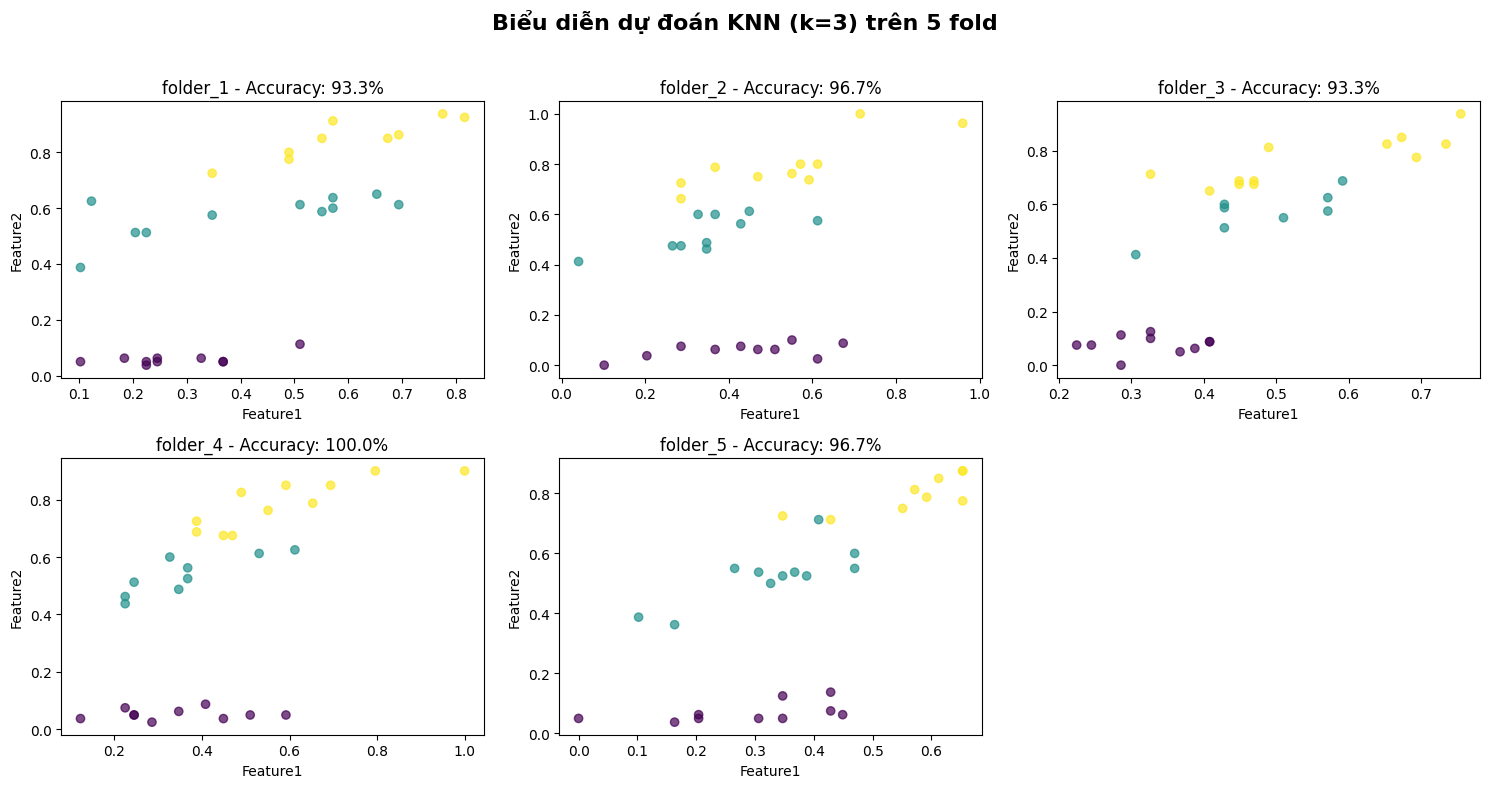

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === Khai báo lại các biến ===
folders = [f"folder_{i}" for i in range(1, 6)]
result_dir = "/media/pphong/D:/ML & DL/ML/AI_02/result_folder"
k = 3
    if not wrong.empty:
        plt.scatter(wrong["Feature1"], wrong["Feature2"], marker="o", s=120, facecolors='none',
                    edgecolors='red', linewidths=2, label="Test sai")
# === Cấu hình lại tên cột đúng ===
feature_x = 'Feature1'
feature_y = 'Feature2'

plt.figure(figsize=(15, 8))

for i, test_folder in enumerate(folders):
    result_path = os.path.join(result_dir, f"result_{test_folder}_k{k}.csv")
    df_result = pd.read_csv(result_path)

    plt.subplot(2, 3, i + 1)
    plt.scatter(df_result[feature_x], df_result[feature_y],
                c=pd.Categorical(df_result['Predicted']).codes,
                cmap='viridis', alpha=0.7)

    plt.title(f"{test_folder} - Accuracy: {result    if not wrong.empty:
        plt.scatter(wrong["Feature1"], wrong["Feature2"], marker="o", s=120, facecolors='none',
                    edgecolors='red', linewidths=2, label="Test sai")s[i]*100:.1f}%")
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)

plt.suptitle(f"Biểu diễn dự đoán KNN (k={k}) trên 5 fold", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
